# Noise, noise and more noise

This notebook contains a short explanation of each of the points asked for Task 2, showing some results of my implementation.

You can find all the code in the folder `src`, each `.py` file contains some specific function.

### Table of Contents

1. [Noise Model](#1.-Noise-Model)
2. [Decompose into basis](#2.-Decompose-into-basis)
3. [Quantum Sum](#3.-Quantum-sum)
4. [Results](#4.-Results)

## 1. Noise Model

### Function definition

We define a function `add_pauli_noise` in the form 

```Python
def add_pauli_noise(circuit: QuantumCircuit, α: float, β: float) -> QuantumCircuit
```
- `circuit` $\rightarrow$ Quantum circuit where the noise will be added
- $\alpha \rightarrow$ Probability of applying a random Pauli operator after a one qubit gate
- $\beta \rightarrow$ Probability of applying a random Pauli operator after a 2 qubit gate


Where $\alpha, \beta \in [0,1)$ and `QuantumCircuit` is the class that represents a quantum circuit in `Qiskit`.

You can see the full implementation in [src/noise.py](src/noise.py).

### Adding noise to a circuit

To show how the circuit gets affected by noise, we're going to draw each of the instances inside the notebook. For this we simply create a `circuit` of 2 qubits.

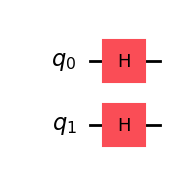

In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)

circuit.draw('mpl')

Now that we have our circuit we can use our newly created function, like this:

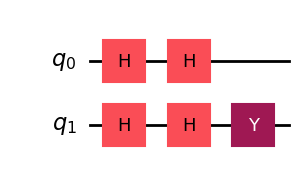

In [2]:
from noise import add_pauli_noise

alpha = 0.45 # probability of adding noise to a 1 qubit gate
beta = 0.9 # probability of adding noise to a 2 qubit gate

noisy_circuit = add_pauli_noise(circuit, alpha, beta)
noisy_circuit.draw('mpl')

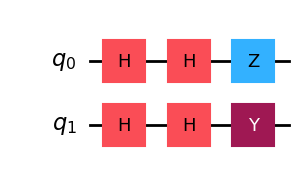

In [3]:
noisy_circuit = add_pauli_noise(circuit, beta, alpha)

noisy_circuit.draw('mpl')

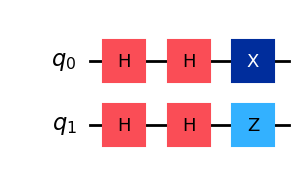

In [4]:
noisy_circuit = add_pauli_noise(circuit, 1-alpha, 1-beta)

noisy_circuit.draw('mpl')

## 2. Decompose into basis

### Function definition

A gate basis is a minimal set of quantum gates that can be combined to implement any arbitrary quantum circuit. We define a function `decompose_into_basis` that takes a quantum circuit and transforms it to the following gate basis: $\{CX, ID, RZ, SX, X\}$.

```Python
def decompose_into_basis(circuit: QuantumCircuit): QuantumCircuit
```

### Decomposing a circuit

Using the previously created QC `circuit`, we can see how it gets decomposed into the defined basis.

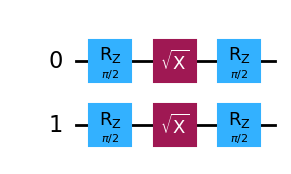

In [5]:
from decompose_basis import decompose_into_basis

basis_circuit = decompose_into_basis(circuit)
basis_circuit.draw('mpl')

## 3. Quantum sum

We are going to build a function that adds two numbers using the Draper algorithm, to do this we define a function [`quantum_sum`](src/quantum_sum.py) as follows:

```Python
def quantum_sum(a: int, b: int) -> QuantumCircuit
```
You can see the implemention of the quantum sum on [src/quantum_sum,py](src/quantum_sum,py). Internally this function requires the Fourier transform and the Inverse Fourier transform, both of this are manually implemented, you can see the code in [src/fourier_transform.py](src/fourier_transform.py).

## Adding two numbers using the quantum sum

In the next example we're adding `1 + 1`, which should result in `2`. Given the probabilistic nature of a quantum algorithm, we are going to get a result that is approximately correct, sometimes the real one.

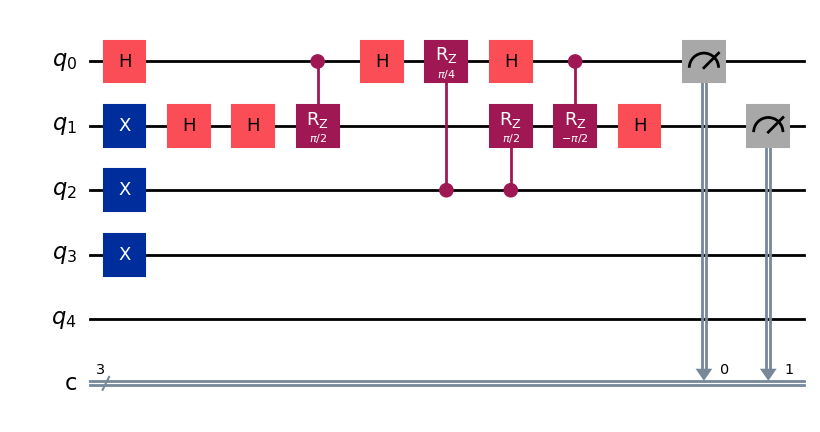

In [6]:
from quantum_sum import quantum_sum

sum_a = 2
sum_b = 3

sum_circuit = quantum_sum(sum_a, sum_b)
sum_circuit.draw('mpl')

In order to get the actual simulation result from our QC, we need to measure it.

In [7]:
from qiskit_aer import AerSimulator

SIMULATOR = AerSimulator(method='statevector')

job = SIMULATOR.run(sum_circuit, shots=1024)

result = job.result()
counts = result.get_counts()

most_frequest_result_binary = counts.most_frequent().replace(" ", "")

simulation_result = int(most_frequest_result_binary, base=2)

Then we can easily print the result of the simulation and the actual result, for comparison:

In [8]:
print("The simulation result of {} + {} is {}.".format(sum_a, sum_b, simulation_result))
print("The real result of {} + {} is {}.".format(sum_a, sum_b, sum_a + sum_b))

The simulation result of 2 + 3 is 2.
The real result of 2 + 3 is 5.


# 4. Results

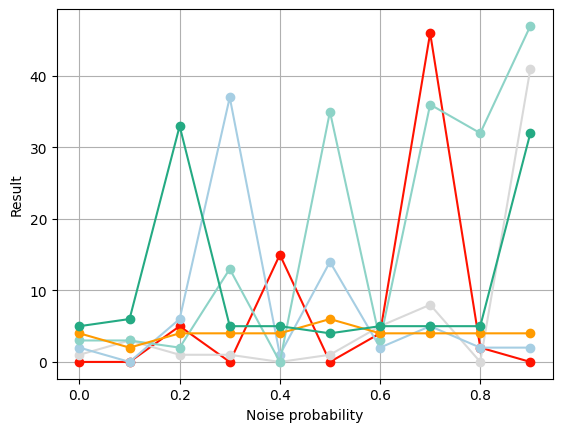

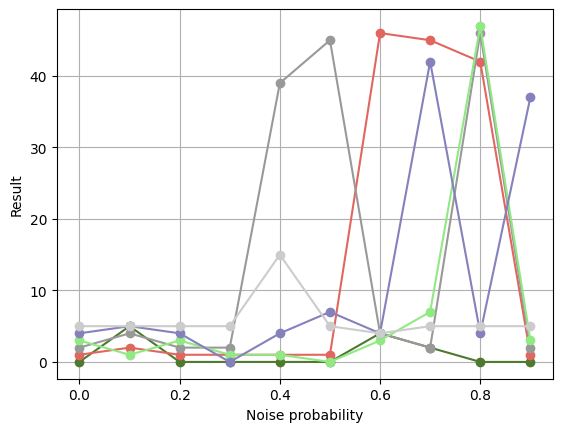

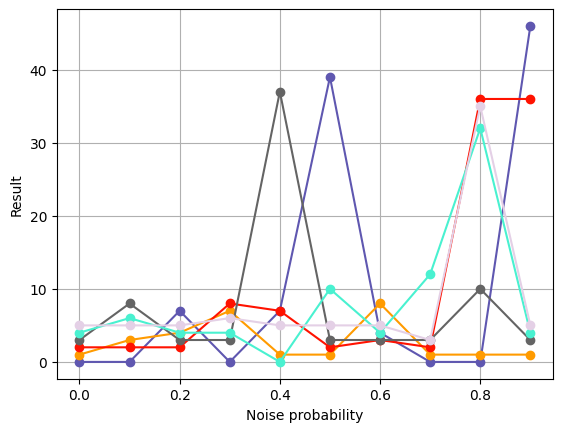

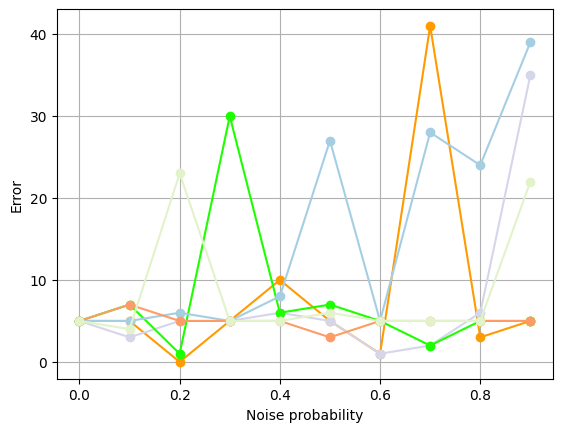

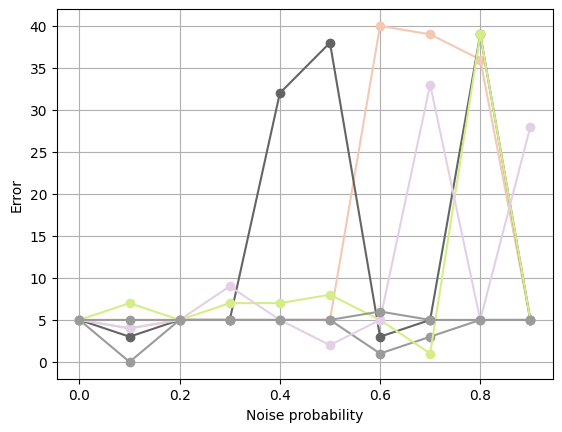

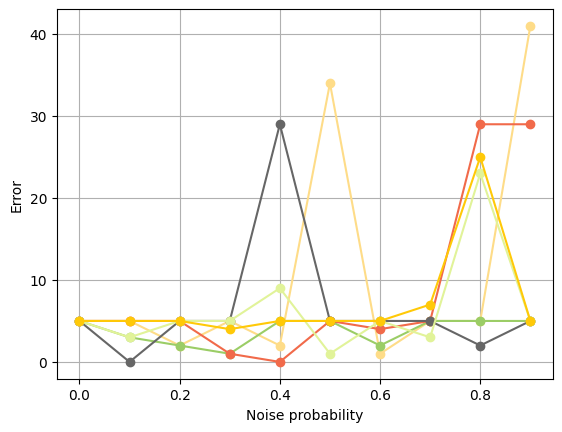

In [9]:
from run import main

main()